# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для компании «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Изучение файлов

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.dummy import DummyRegressor
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold_recovery_train = pd.read_csv('C:/Users/Nshan/Desktop/Сброный_проект_2/gold_recovery_train_new.csv')
gold_recovery_test = pd.read_csv('C:/Users/Nshan/Desktop/Сброный_проект_2/gold_recovery_test_new.csv')
gold_recovery_full = pd.read_csv('C:/Users/Nshan/Desktop/Сброный_проект_2/gold_recovery_full_new.csv')

In [3]:
gold_recovery_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Необходимо преобразовать первый столбец в таблице gold_recovery_train в datetime.

In [6]:
gold_recovery_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [7]:
gold_recovery_train.duplicated().sum()

0

In [8]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
gold_recovery_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [11]:
gold_recovery_test.duplicated().sum()

0

In [12]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [13]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [14]:
gold_recovery_full.duplicated().sum()

0

In [15]:
gold_recovery_full.isna().sum().max()

1748

Суммарно пропуски составляют в каждом датафрейме менее 10 процентов. Поскольку данных не много, то целессобразно в дальнейшем рассмотреть замену пропусков на медианные значение. Также необходимо изменить тип первого столбца каждого датафрейма.
Дубликатов в датафремах нет.

In [16]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


### Проверка правильности подсчёта эффективности обогащения

In [17]:
recovery = (gold_recovery_train['rougher.output.concentrate_au'] * (gold_recovery_train['rougher.input.feed_au'] - gold_recovery_train['rougher.output.tail_au'])) / (
gold_recovery_train['rougher.input.feed_au'] * (gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['rougher.output.tail_au'])) * 100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [18]:
gold_recovery_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [19]:
mean_absolute_error(recovery, gold_recovery_train['rougher.output.recovery'])

9.73512347450521e-15

**Среднее абсолютное отклонение после флотации имеет минимальное отклонение, что говорит о том, что показатель в таблице посчитан верно.**

### Анализ признаков недоступных в тестовой выборке

In [20]:
print(gold_recovery_train.shape)
print(gold_recovery_test.shape)
print(gold_recovery_full.shape)

(14149, 87)
(5290, 53)
(19439, 87)


в тестовой выборке не хватает 34 признаков, что связано с тем, что данные показатели измеряются позже.

In [21]:
col_list = list(set(gold_recovery_full) - set(gold_recovery_test))
col_list.sort()
col_list

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

выше перечисленных параметров нет в тестовой выборке. В тестовой выборке отсутствуют параметры итоговых результатов технологических этапов.

Поскольку обучать модель на параметрах, которых нет в тестовой выборке некорректно, необходиом будет убрать из тренировочной выборки те параметры, которых не было в тестовой.

### Предобработка данных

In [22]:
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'], format='%Y-%m-%d %H:%M:%S')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format='%Y-%m-%d %H:%M:%S')
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format='%Y-%m-%d %H:%M:%S')

In [23]:
gold_recovery_train.head(20)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Поскольку пропусков много, то удалить их без потери качества не удастся. Исходя их данных можно заметить, что соседние по времени данные имеют близкие значения. Поэтому заполним пропуски методом "ffil", чтобы устранить пропуски.

In [24]:
gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_test = gold_recovery_test.fillna(method='ffill')
gold_recovery_full = gold_recovery_full.fillna(method='ffill')

In [25]:
gold_recovery_full.isna().sum().max()

0

**Выводы**

1. Столбцы с датой преобразованы в тип datetime.
2. В тренировочной выборке, например, пропуски составляют более 10 процентов. Поскольку данных не много, то целессобразно заменить пропуски методом ffill по причине того, что рядом стоящие значение близки друг к другу. 
3. Дубликатов нет.
4. Эффективность обогащения посчитана правильно.


## Анализ данных

### как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [26]:
gold_recovery_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

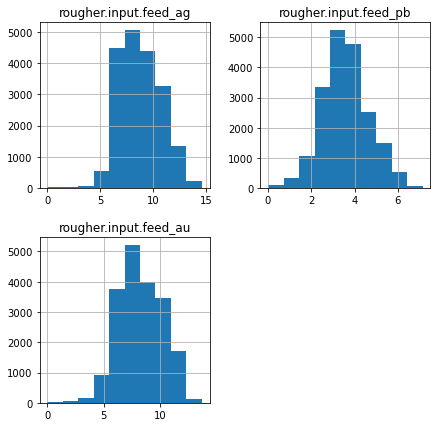

In [27]:
gold_recovery_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']].hist(figsize=(7, 7))
plt.show()

До этапа флотации коцентрация трёх металлов распределена вокруг слудующих значений:
серебро - 7,8
медь - 3,5
золото - 7,5

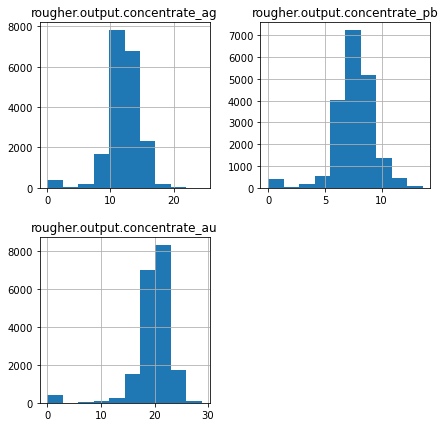

In [28]:
gold_recovery_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].hist(figsize=(7, 7))
plt.show()

In [29]:
print('Этап Флотации')
print('Среднее AG:', gold_recovery_full['rougher.output.concentrate_ag'].mean())
print('Медианное AG:', gold_recovery_full['rougher.output.concentrate_ag'].median())
print('Среднее AU:', gold_recovery_full['rougher.output.concentrate_au'].mean())
print('Медианное AU:', gold_recovery_full['rougher.output.concentrate_au'].median())
print('Среднее PB:', gold_recovery_full['rougher.output.concentrate_pb'].mean())
print('Медианное PB:', gold_recovery_full['rougher.output.concentrate_pb'].median())

Этап Флотации
Среднее AG: 11.994759359873452
Медианное AG: 12.098114967346191
Среднее AU: 19.772000139486334
Медианное AU: 20.280214025891475
Среднее PB: 7.606272313194984
Медианное PB: 7.742580079502529


Концентрация металлов после этапа флотации для серебра равна 12, для золота - 21, для меди - 7,5.

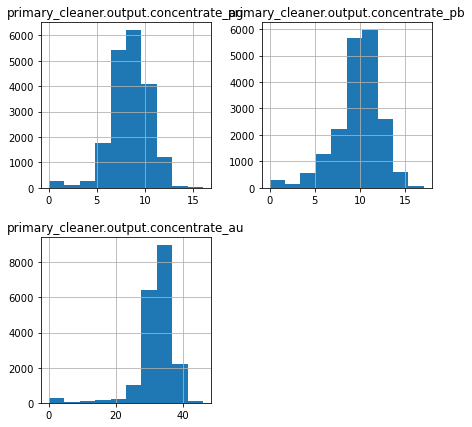

In [30]:
gold_recovery_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au']].hist(figsize=(7, 7))
plt.show()

In [31]:
print('Этап Первичной обработки')
print('Среднее AG:', gold_recovery_full['primary_cleaner.output.concentrate_ag'].mean())
print('Медианное AG:', gold_recovery_full['primary_cleaner.output.concentrate_ag'].median())
print('Среднее AU:', gold_recovery_full['primary_cleaner.output.concentrate_au'].mean())
print('Медианное AU:', gold_recovery_full['primary_cleaner.output.concentrate_au'].median())
print('Среднее PB:', gold_recovery_full['primary_cleaner.output.concentrate_pb'].mean())
print('Медианное PB:', gold_recovery_full['primary_cleaner.output.concentrate_pb'].median())

Этап Первичной обработки
Среднее AG: 8.442408077719056
Медианное AG: 8.507297972365805
Среднее AU: 32.1194004078766
Медианное AU: 32.841295480233306
Среднее PB: 9.810316539310222
Медианное PB: 10.142270415359071


Во время первого этапа очистки концентрация серебра в среднем снижается, а вот концентрация меди и золота растут. причём концентрация золота в среднем выросла на 50%.

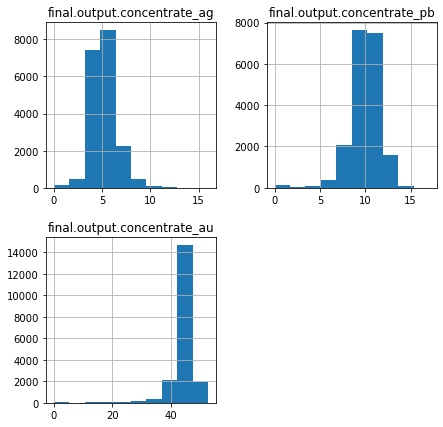

In [32]:
gold_recovery_full[['final.output.concentrate_ag','final.output.concentrate_pb', 'final.output.concentrate_au']].hist(figsize=(7, 7))
plt.show()

In [33]:
print('Этап Первичной обработки')
print('Среднее AG:', gold_recovery_full['final.output.concentrate_ag'].mean())
print('Медианное AG:', gold_recovery_full['final.output.concentrate_ag'].median())
print('Среднее AU:', gold_recovery_full['final.output.concentrate_au'].mean())
print('Медианное AU:', gold_recovery_full['final.output.concentrate_au'].median())
print('Среднее PB:', gold_recovery_full['final.output.concentrate_pb'].mean())
print('Медианное PB:', gold_recovery_full['final.output.concentrate_pb'].median())

Этап Первичной обработки
Среднее AG: 5.168386967510268
Медианное AG: 5.066039118467836
Среднее AU: 44.076512941952664
Медианное AU: 45.01124391455689
Среднее PB: 9.978821384192898
Медианное PB: 10.10226350598865


Концентрация золота после второго этапа очистки выросла на 50% при параллельном уменьшении концентрации других металлов.

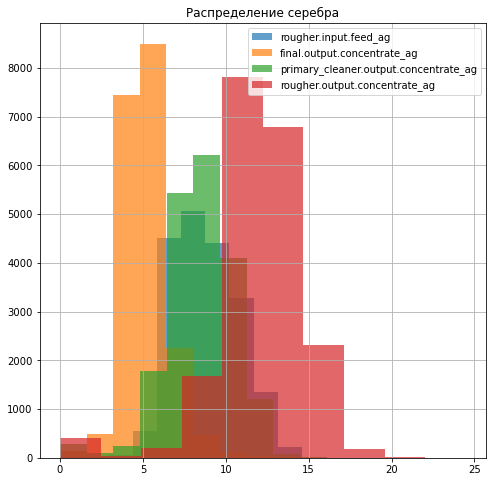

In [34]:
plt.figure(figsize=(8, 8))
ax = gold_recovery_full['rougher.input.feed_ag'].hist(legend=True, alpha=0.7)
gold_recovery_full['final.output.concentrate_ag'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['primary_cleaner.output.concentrate_ag'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['rougher.output.concentrate_ag'].hist(ax=ax, legend=True, alpha=0.7)
plt.title('Распределение серебра')
plt.show()



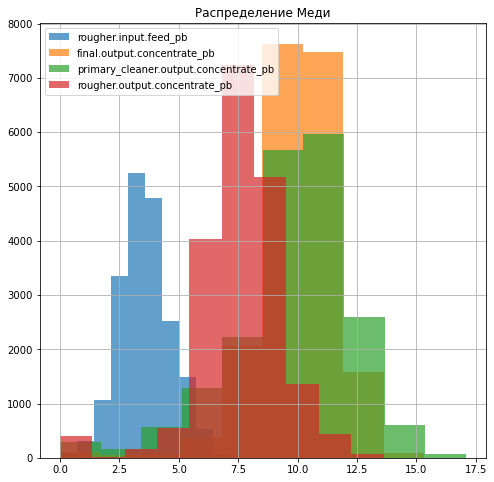

In [35]:
plt.figure(figsize=(8, 8))
ax = gold_recovery_full['rougher.input.feed_pb'].hist(legend=True, alpha=0.7)
gold_recovery_full['final.output.concentrate_pb'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['primary_cleaner.output.concentrate_pb'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['rougher.output.concentrate_pb'].hist(ax=ax, legend=True, alpha=0.7)
plt.title('Распределение Меди')
plt.show()

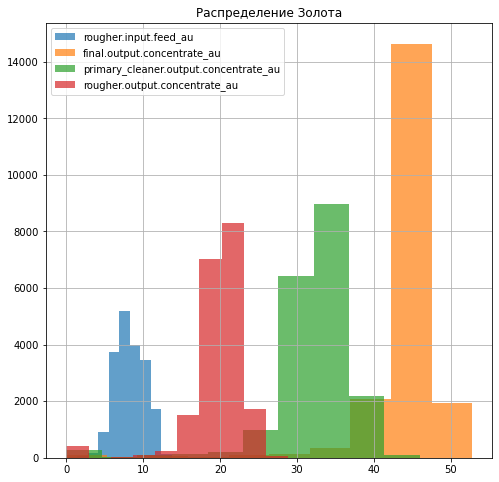

In [36]:
plt.figure(figsize=(8, 8))
ax = gold_recovery_full['rougher.input.feed_au'].hist(legend=True, alpha=0.7)
gold_recovery_full['final.output.concentrate_au'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['primary_cleaner.output.concentrate_au'].hist(ax=ax, legend=True, alpha=0.7)
gold_recovery_full['rougher.output.concentrate_au'].hist(ax=ax, legend=True, alpha=0.7)
plt.title('Распределение Золота')
plt.show()

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

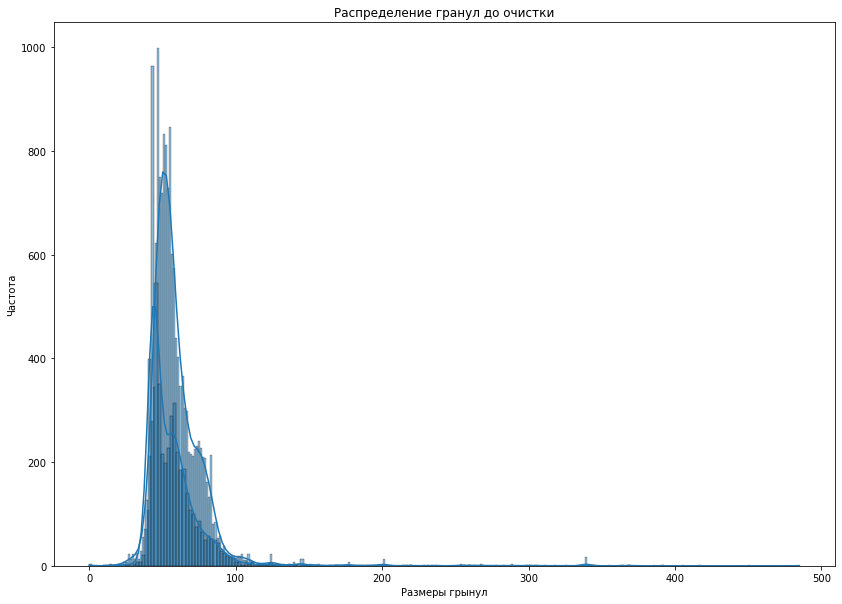

In [37]:
plt.figure(figsize = (14, 10))
sns.histplot(data=gold_recovery_train['rougher.input.feed_size'], kde=True)
sns.histplot(data=gold_recovery_test['rougher.input.feed_size'], kde=True)
plt.title('Распределение гранул до очистки')
plt.xlabel('Размеры грынул')
plt.ylabel('Частота')
plt.show()

**Распределение размеров гранул на тестовой и тренировочной выборках сильных отличий не имеет, что говорит о том, что оценка модели будет правильной**

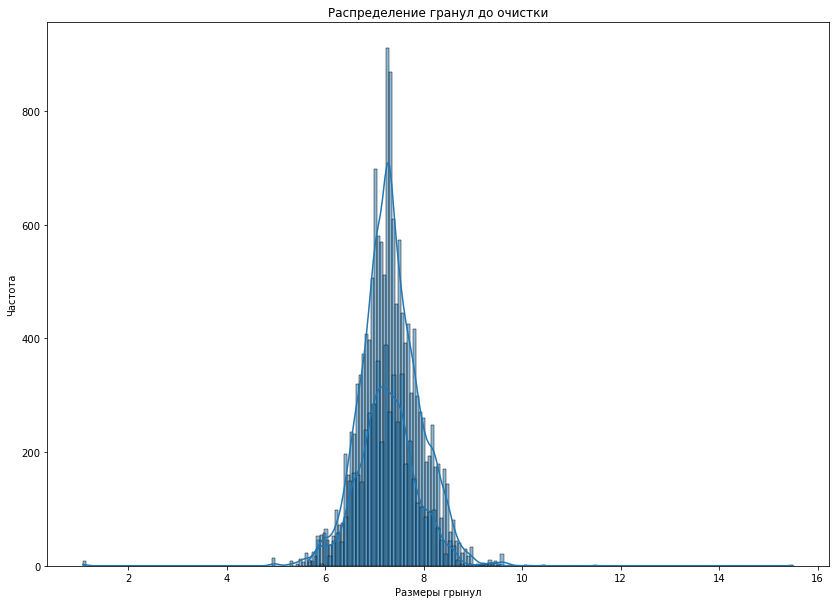

In [38]:
plt.figure(figsize = (14, 10))
sns.histplot(data=gold_recovery_train['primary_cleaner.input.feed_size'], kde=True)
sns.histplot(data=gold_recovery_test['primary_cleaner.input.feed_size'], kde=True)
plt.title('Распределение гранул до очистки')
plt.xlabel('Размеры грынул')
plt.ylabel('Частота')
plt.show()

In [39]:
st.kstest(gold_recovery_train['rougher.input.feed_size'], gold_recovery_test['rougher.input.feed_size'])

KstestResult(statistic=0.2502993057549405, pvalue=5.1997046130555955e-213)

In [40]:
st.kstest(gold_recovery_train['primary_cleaner.input.feed_size'], gold_recovery_test['primary_cleaner.input.feed_size'])

KstestResult(statistic=0.05922065470904381, pvalue=3.5273935105512727e-12)

После первого этапа очистки распределение размеров гранул остаётся схожим. 

Тест Колмогорова_Смирнова показал, что распределения отличаются, но визуально они похожи, то есть сильных отличий нет.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [41]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

In [42]:
gold_recovery_full['sum_concen_rough'] = (gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_pb'] +
                                         gold_recovery_full['rougher.output.concentrate_sol'] + gold_recovery_full['rougher.output.concentrate_au'])


In [43]:
gold_recovery_full['sum_concen_primar'] = (gold_recovery_full['primary_cleaner.output.concentrate_ag'] + gold_recovery_full['primary_cleaner.output.concentrate_pb'] +
                                         gold_recovery_full['primary_cleaner.output.concentrate_sol'] + gold_recovery_full['primary_cleaner.output.concentrate_au'])


In [44]:
gold_recovery_full['sum_concen_final'] = (gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_pb'] +
                                         gold_recovery_full['final.output.concentrate_sol'] + gold_recovery_full['final.output.concentrate_au'])


In [45]:
gold_recovery_full['sum_concen_raw'] = (gold_recovery_full['rougher.input.feed_ag'] + gold_recovery_full['rougher.input.feed_pb'] +
                                         gold_recovery_full['rougher.input.feed_sol'] + gold_recovery_full['rougher.input.feed_au'])


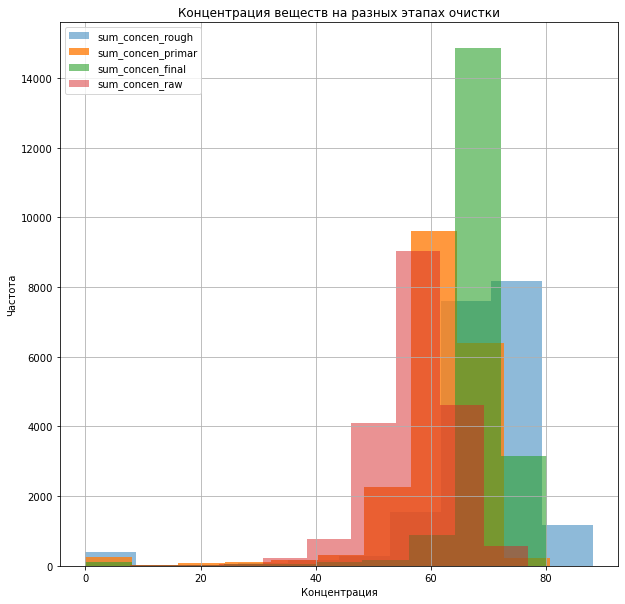

In [46]:
plt.figure(figsize=(10, 10))
ax = gold_recovery_full['sum_concen_rough'].hist(alpha=0.5, legend=True)
gold_recovery_full['sum_concen_primar'].hist(ax=ax, alpha = 0.8, legend=True)
gold_recovery_full['sum_concen_final'].hist(ax=ax, legend=True, alpha=0.6)
gold_recovery_full['sum_concen_raw'].hist(ax=ax, legend=True, alpha=0.5)
plt.title('Концентрация веществ на разных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.show()

По гистограмме Концентрации веществ на разных этапах очистки видно, что есть концентрации частоты которых практически равны нулю (концентрация от 0 до 40). Данный факт может помешать эффективному обучению модели. В связи с этим необходимо очистить модель от выбросов.

In [47]:
gold_recovery_full = gold_recovery_full[gold_recovery_full['sum_concen_primar'] > 40]
gold_recovery_full = gold_recovery_full[gold_recovery_full['sum_concen_rough'] > 40]
gold_recovery_full = gold_recovery_full[gold_recovery_full['sum_concen_final'] > 40]
gold_recovery_full = gold_recovery_full[gold_recovery_full['sum_concen_raw'] > 40]


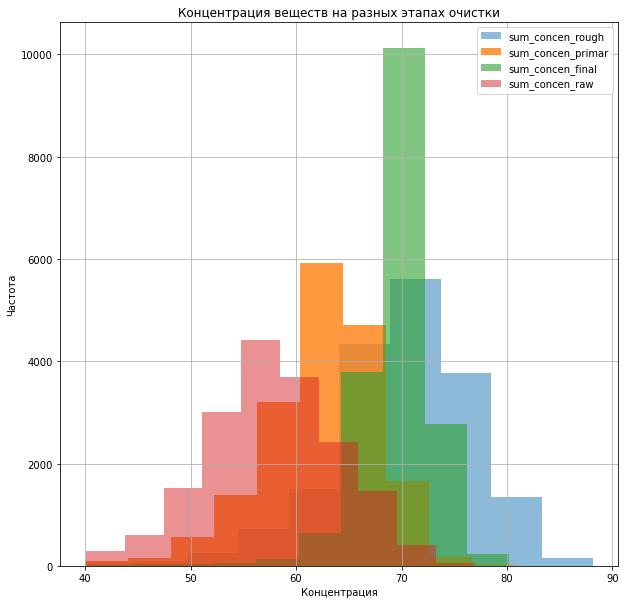

In [48]:
plt.figure(figsize=(10, 10))
ax = gold_recovery_full['sum_concen_rough'].hist(alpha=0.5, legend=True)
gold_recovery_full['sum_concen_primar'].hist(ax=ax, alpha = 0.8, legend=True)
gold_recovery_full['sum_concen_final'].hist(ax=ax, legend=True, alpha=0.6)
gold_recovery_full['sum_concen_raw'].hist(ax=ax, legend=True, alpha=0.5)
plt.title('Концентрация веществ на разных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.show()

По мере очистки золота разброс в цонцентрации веществ снижается.

In [49]:
def sum_rough(data):
    data['sum_concen_rough'] = (data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb'] +
                                         data['rougher.output.concentrate_sol'] + data['rougher.output.concentrate_au'])
    data['sum_concen_primar'] = (data['primary_cleaner.output.concentrate_ag'] + data['primary_cleaner.output.concentrate_pb'] +
                                         data['primary_cleaner.output.concentrate_sol'] + data['primary_cleaner.output.concentrate_au'])
    data['sum_concen_final'] = (data['final.output.concentrate_ag'] + data['final.output.concentrate_pb'] +
                                         data['final.output.concentrate_sol'] + data['final.output.concentrate_au'])
    data['sum_concen_raw'] = (data['rougher.input.feed_ag'] + data['rougher.input.feed_pb'] +
                                         data['rougher.input.feed_sol'] + data['rougher.input.feed_au'])

    



In [50]:
sum_rough(gold_recovery_train)

In [51]:
def develop(data):
    data = data[data['sum_concen_primar'] > 40]
    data = data[data['sum_concen_rough'] > 40]
    data = data[data['sum_concen_final'] > 40]
    data = data[data['sum_concen_raw'] > 40]

In [52]:
develop(gold_recovery_train)

In [53]:
gold_recovery_train = gold_recovery_train.drop(col_list, axis=1)

In [54]:
gold_recovery_train.shape

(14149, 57)

In [55]:
gold_recovery_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Поскольку столбцы с суммарной концентрацией могут быть определены через другие признаки, то для избежания возможности переобучения стоит в дальнейшем их удалить.

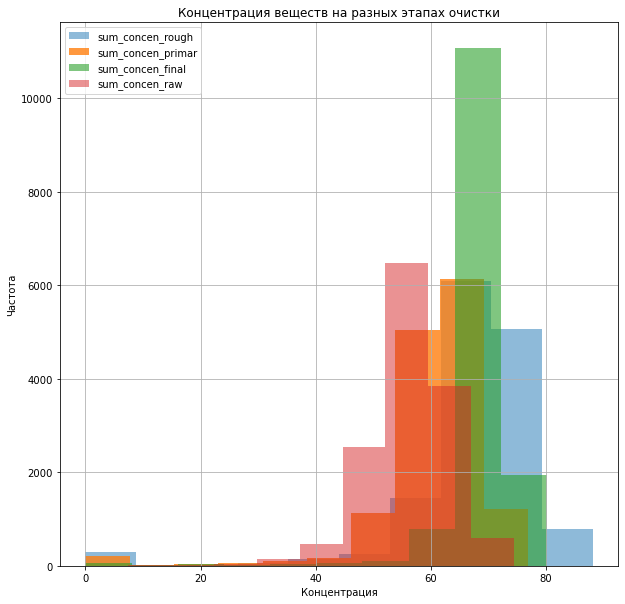

In [56]:
plt.figure(figsize=(10, 10))
ax = gold_recovery_train['sum_concen_rough'].hist(alpha=0.5, legend=True)
gold_recovery_train['sum_concen_primar'].hist(ax=ax, alpha = 0.8, legend=True)
gold_recovery_train['sum_concen_final'].hist(ax=ax, legend=True, alpha=0.6)
gold_recovery_train['sum_concen_raw'].hist(ax=ax, legend=True, alpha=0.5)
plt.title('Концентрация веществ на разных этапах очистки')
plt.xlabel('Концентрация')
plt.ylabel('Частота')

plt.show()

In [57]:
gold_recovery_train = gold_recovery_train.drop(['sum_concen_rough', 'sum_concen_primar', 'sum_concen_final', 'sum_concen_raw'], 1)

**Выводы**

До этапа флотации коцентрация трёх металлов распределена вокруг слудующих значений:
серебро - 7,8
медь - 3,5
золото - 7,5

Этап Флотации
Среднее AG: 11.994759359873429
Медианное AG: 12.098114967346191
Среднее AU: 19.772000139486316
Медианное AU: 20.280214025891475
Среднее PB: 7.606272313195003
Медианное PB: 7.742580079502529
Концентрация металлов после этапа флотации для серебра равна 12, для золота - 21, для меди - 7,5.

Этап Первичной обработки
Среднее AG: 8.44240807771906
Медианное AG: 8.507297972365805
Среднее AU: 32.1194004078765
Медианное AU: 32.841295480233306
Среднее PB: 9.810316539310149
Медианное PB: 10.142270415359071
Во время первого этапа очистки концентрация серебра в среднем снижается, а вот концентрация меди и золота растут. причём концентрация золота в среднем выросла на 50%.

Этап Первичной обработки
Среднее AG: 5.168386967510243
Медианное AG: 5.066039118467836
Среднее AU: 44.0765129419528
Медианное AU: 45.01124391455689
Среднее PB: 9.978821384192907
Медианное PB: 10.10226350598865
Концентрация золото после второго этапа очистки выросла на 50% при параллельном уменьшении концентрации других металлов.

По гистограмме Концентрации веществ на разных этапах очистки видно, что есть концентрации частоты которых практически равны нулю (концентрация от 0 до 40). Данный факт может помешать эффективному обучению модели. В связи с этим  важно очистить данные  от выбросов.
По мере очистки золота разброс в концентрации веществ снижается.
Для повышения качества будущей модели из тренировочной выборки были удалены те столбцы (праметры), которые отсутствовали в тестовой выборке.

## Модель

In [58]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17847 entries, 0 to 19438
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                17847 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         17847 non-null  float64       
 2   final.output.concentrate_pb                         17847 non-null  float64       
 3   final.output.concentrate_sol                        17847 non-null  float64       
 4   final.output.concentrate_au                         17847 non-null  float64       
 5   final.output.recovery                               17847 non-null  float64       
 6   final.output.tail_ag                                17847 non-null  float64       
 7   final.output.tail_pb                                17847 non-null  float64       
 8   final.

In [59]:
len(gold_recovery_full['date'].unique())

17847

In [60]:
date = list(gold_recovery_train['date'])
temp = gold_recovery_full.query("date == @date")[['date', 'rougher.output.recovery', 'final.output.recovery']]
gold_recovery_train = gold_recovery_train.merge(temp, on='date')
gold_recovery_train

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,73.755150
12900,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,69.049291
12901,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,67.002189
12902,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


In [61]:
date_t = list(gold_recovery_test['date'])
temp_t = gold_recovery_full.query("date == @date_t")[['date', 'rougher.output.recovery', 'final.output.recovery']]
gold_recovery_test = gold_recovery_test.merge(temp_t, on='date')
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,95.172585,68.919891
4939,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,94.575036,68.440582
4940,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,93.018138,67.092759
4941,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,92.599042,68.061186


In [62]:
def feature_target(data):
    data_features = data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], 1)
    data_targ_rough = data['rougher.output.recovery']
    data_targ_final = data['final.output.recovery']
    return data_features, data_targ_rough, data_targ_final

In [63]:
train_features, train_target_rough, train_target_fin = feature_target(gold_recovery_train)

In [64]:
test_features, test_target_rough, test_target_fin = feature_target(gold_recovery_test)

In [65]:
train_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [66]:
def smape_rough(target_rough, predictions_rough):
    smape_rough = np.sum((np.absolute(target_rough - predictions_rough)) / ((np.absolute(target_rough) + np.absolute(predictions_rough)) / 2))
    smape_rough = smape_rough * 100 / len(target_rough)
    return smape_rough                         
    
def smape_fin(target_fin, predictions_fin):   
    smape_fin = np.sum((np.absolute(target_fin - predictions_fin)) / ((np.absolute(target_fin) + np.absolute(predictions_fin)) / 2))
    smape_fin = smape_fin * 100 / len(target_fin)
    return smape_fin


In [67]:
smape_r = make_scorer(smape_rough, greater_is_better=False)
smape_f = make_scorer(smape_fin, greater_is_better=False)

In [68]:
model = DecisionTreeRegressor(random_state=12345)
scores = cross_val_score(model, train_features, train_target_rough, cv=5, scoring=smape_r)
final_rou = scores.sum() / len(scores)

scores_fin = cross_val_score(model, train_features, train_target_fin, cv=5, scoring=smape_f)
final_fin = scores_fin.sum() / len(scores)
print('Средняя оценка модели "smape":', abs(0.25 * final_rou + 0.75 * final_fin))


Средняя оценка модели "smape": 13.842327683987664


Модель дерева не имеет высокого качества, так как среднее симметричное процентное отклонение составляет более 19%.

In [69]:

best_smape = 1000
for i in range(2, 14, 4):
    for h in range(10, 100, 25):
        model=RandomForestRegressor(n_estimators=i, max_depth=h, random_state=12345)
        scores_rou = cross_val_score(model, train_features, train_target_rough, cv=3, scoring=smape_r)
        final_rou = scores.sum() / len(scores)
        
        scores_fin = cross_val_score(model, train_features, train_target_fin, cv=3, scoring=smape_f)
        final_fin = scores_fin.sum() / len(scores)
        smape =  abs(0.25 * final_rou + 0.75 * final_fin)
        if smape < best_smape:
            best_model = model
            best_high = h
            estim = i
            best_smape = smape
            
print('best smape:', best_smape)
print('best_model:', model)
print('best_high:', h)
print('best_estimators:', i)

best smape: 6.636732272209521
best_model: RandomForestRegressor(max_depth=85, n_estimators=10, random_state=12345)
best_high: 85
best_estimators: 10


In [70]:
params_set = {
    'n_estimators': [2, 6, 10, 14],
    'max_depth': [10, 35, 60, 85],
    'min_samples_leaf': [1, 3, 5]
}

grid_1 = GridSearchCV(estimator = RandomForestRegressor(random_state = 12345),
                      param_grid = params_set,
                      scoring = smape_r,
                      cv = 3
                     )

grid_1.fit(train_features, train_target_rough)
print(grid_1.best_params_)
print(grid_1.best_score_)

{'max_depth': 35, 'min_samples_leaf': 5, 'n_estimators': 10}
-7.622572934684141


Модель случайного леса показывает лучшие результаты чем модель дерева решений. среднее симметричное процентное отклонение составляет почти 10%.

In [71]:
model = LinearRegression()
scores_rou = cross_val_score(model, train_features, train_target_rough, cv=5, scoring=smape_r)
final_rou = scores.sum() / len(scores)
        
scores_fin = cross_val_score(model, train_features, train_target_fin, cv=5, scoring=smape_f)
final_fin = scores_fin.sum() / len(scores)
smape =  abs(0.25 * final_rou + 0.75 * final_fin)
print('Оценка модели:', smape)

Оценка модели: 10.130567013634797


Модель линейной регрессии показала средние результаты, среднее симметричное процентное отклонение составляет более 13,5%. Что лучше чем у модели дерева решений, но хуже чем у случайного леса

**Проверка модели на тестовой выборке**

In [72]:
model_r = RandomForestRegressor(max_depth=85, n_estimators=10, random_state=12345)
model_r.fit(train_features, train_target_rough)
predict_rough = model_r.predict(test_features)
smape_r = smape_rough(test_target_rough, predict_rough)

model_fin = RandomForestRegressor(max_depth=85, n_estimators=10, random_state=12345)
model_fin.fit(train_features, train_target_fin)
predictions_fin = model_fin.predict(test_features)
smape_final = smape_fin(test_target_fin, predictions_fin)

print('Итоговый smape на тестовой выборке составляет:', abs(0.25 * smape_r + 0.75 * smape_final))

Итоговый smape на тестовой выборке составляет: 7.138027673650722


**Проверка модели на адекватность**

In [73]:
mean_pred_rough = pd.Series(train_target_rough.mean(), index=train_target_rough.index)
mean_pred_fin = pd.Series(train_target_fin.mean(), index=train_target_fin.index)

smape_r = smape_rough(test_target_rough, mean_pred_rough)
smape_final = smape_fin(test_target_fin, mean_pred_fin)

print('Итоговый smape на выборке из предсказаний из средних занчений:', abs(0.25 * smape_r + 0.75 * smape_final))

Итоговый smape на выборке из предсказаний из средних занчений: 7.217980177280101


Обученная модель проверку на адекватность прошла. Ключевая метрика на выборке по предсказаниям из средних значений показала большее симметричное среднее абсолютное процентное отклонение.

## Выводы + Чек-лист готовности проекта

1. Столбцы с датами преобразованы в тип datetime.
2. Суммарно пропуски составляют в каждом датафрейме менее 10 процентов. Поскольку данных не много, то целессобразно заменить пропуски методом ffill, так как рядом стоящие элементы датафрейма имеют минимальные различия. 
3. До этапа флотации коцентрация трёх металлов распределена вокруг слудующих значений:
серебро - 7,8
медь - 3,5
золото - 7,5

4. Этап Флотации
Среднее AG: 11.994759359873429
Медианное AG: 12.098114967346191
Среднее AU: 19.772000139486316
Медианное AU: 20.280214025891475
Среднее PB: 7.606272313195003
Медианное PB: 7.742580079502529
Концентрация металлов после этапа флотации для серебра равна 12, для золота - 21, для меди - 7,5.

5. Этап Первичной обработки
Среднее AG: 8.44240807771906
Медианное AG: 8.507297972365805
Среднее AU: 32.1194004078765
Медианное AU: 32.841295480233306
Среднее PB: 9.810316539310149
Медианное PB: 10.142270415359071
Во время первого этапа очистки концентрация серебра в среднем снижается, а вот концентрация меди и золота растут. причём концентрация золота в среднем выросла на 50%.

6. Этап Первичной обработки
Среднее AG: 5.168386967510243
Медианное AG: 5.066039118467836
Среднее AU: 44.0765129419528
Медианное AU: 45.01124391455689
Среднее PB: 9.978821384192907
Медианное PB: 10.10226350598865
Концентрация золото после второго этапа очистки выросла на 50% при параллельном уменьшении концентрации других металлов.
7. По гистограмме Концентрации веществ на разных этапах очистки видно, что есть концентрации частоты которых практически равны нулю (концентрация от 0 до 40). Данный факт может помешать эффективному обучению модели. В связи с этим модель была очищена от выбросов.
8. По мере очистки золота разброс в цонцентрации веществ уменьшается
9. Наиболее эффективно оказалась модель случайного леса с парметрами: max_depth=85, n_estimators=10.
10. Итоговый smape (симметричное среднее процентное отклонение) на тестовой выборке составляет: 12.871073474230785
11. Обученная модель проверку на адекватность прошла. Ключевая метрика на выборке по предсказаниям из средних значений показала большее симметричное среднее абсолютное процентное отклонение.